# Préparation des données
Nous allons ici charger notre Dataset Cifar_10, sur lequel nous allons travailler, ainsi que notre modele d'extraction de caractéristiques et effectuer l'extraction de caractéristiques.

## Importation des bibliothèques 

In [15]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras_preprocessing import image
from keras.applications import vgg16
import joblib
import matplotlib.pyplot as plt
from pathlib import Path

# Chargement des données

In [3]:
# Récupération des données d'entrainement et de test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# affichage des formes de nos données
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
# Affichage d'une image, sa forme, et son type
print('Première image est de la forme : ',x_train[0].shape)
print('Première image est du type  : ',x_train[0].dtype)
print('Interval des valeurs d\' une image : [',x_train[0].min(),',',x_train[0].max(),']')

Première image est de la forme :  (32, 32, 3)
Première image est du type  :  uint8
Interval des valeurs d' une image : [ 0 , 255 ]


Text(0.5, 1.0, 'Affichage première image')

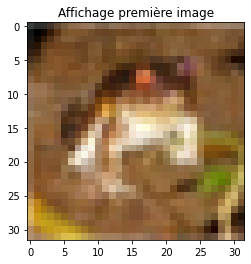

In [6]:
# affichage d'une image
plt.imshow(x_train[0])
plt.title('Affichage première image')

* Nous voyons ici nos données d’entraînement sont de 50000 images, de 32x32 pixels, de 3 couches de couleurs RGB, en forme matricielle.
* Les labels qui leurs sont associés, sont des vecteurs de 50000 éléments.
* Une image est de type uint8, dont les valeurs des pixels sont entre 0 et 255.
* De même pour les données de Test.

# Normalisation des données 

In [7]:
# Mettre les données d'Entraînement et de Test sous la forme adéquate à notre modèle d'extraction de caractéristiques 
x_train = vgg16.preprocess_input(x_train)
x_test = vgg16.preprocess_input(x_test)
# Mettre les Étiquettes sous la forme adéquate
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

x_train.shape , y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [8]:
# Affichage d'une image, sa forme, et son type après la normalisation
print('Première image est de la forme : ',x_train[0].shape)
print('Première image est du type  : ',x_train[0].dtype)
print('Interval des valeurs d\' une image : [',x_train[0].min(),',',x_train[0].max(),']')

Première image est de la forme :  (32, 32, 3)
Première image est du type  :  float32
Interval des valeurs d' une image : [ -123.68 , 136.22101 ]


Nous voyons ici que les données des images sont transformées en forme adéquate :
* Type : float32
* Intervalle de valeurs négative et positives

Et ceci car le VGG16 effectue des opérations sur des valeurs qui doivent être de cette forme.

# Chargement du modèle d'extraction de caractéristiques 

In [9]:
# Chargement du modèle RNA pré-entrainé sans la couche de prédiction
features_extraction_model = vgg16.VGG16(weights='imagenet', include_top=False,input_shape=(32,32,3))

In [33]:
# Affichage de la structure de notre modèle 
features_extraction_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

# Extraction de caractéristiques 
Nous allons maintenant effectuer l'extraction de caractéristiques sur nos données en utilisant notre modèle d'extraction.

In [34]:
# Extraction de caract. à partir des données d’entraînement 
x_features_train = features_extraction_model.predict(x_train)
# Extraction de caract. à partir des données de test
x_features_test = features_extraction_model.predict(x_test)

In [38]:
# Affichage des caractéristiques d'une image, sa forme, et son type 
print('Caractéristiques de la forme : ',x_features_train[0].shape)
print('Caractéristiques  du type  : ',x_features_train[0].dtype)
print('Interval des valeurs des Caractéristiques : [',x_features_train[0].min(),',',x_features_train[0].max(),']')

Caractéristiques de la forme :  (1, 1, 512)
Caractéristiques  du type  :  float32
Interval des valeurs des Caractéristiques : [ 0.0 , 122.61726 ]


Nous voyons maintenant nos caractéristiques obtenus par notre dataset, les caractéristiques extraites d'une image :
* Sont un vecteur de 512 valeurs,
* Sont de type float32,
* Sont dans un intervalle positif.

# Sauvegarde de Données
Nous allons maintenant sauvgarder nos caractéristiques extraites, pour les utiliser plus tard.

In [39]:
# Sauvegarder les tableaux de caractéristiques extraites dans un fichier
joblib.dump(x_features_train, "x_features_train.dat")
joblib.dump(x_features_test, "x_features_test.dat")

# Sauvegarder les étiquettes
joblib.dump(y_train, "y_train.dat")
joblib.dump(y_test, "y_test.dat")

['y_test.dat']

In [16]:
# Enregistrer la structure du réseau
model_extraction_features = features_extraction_model.to_json()
f = Path("model_extr_feat_structure.json")
f.write_text(model_extraction_features)

# Sauvegarde des poids appris par le réseau
features_extraction_model.save_weights("model_extr_feat_structure_weights.h5")